<a href="https://colab.research.google.com/github/AbelS4l4S/Learning-NLP/blob/main/Procesamiento_Natural_del_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuración inicial**


In [ ]:
import nltk

In [ ]:
#Corpus de títulos de períodicos en español
nltk.download('cess_esp')

#Dataset con corpus de libros
nltk.download('book')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |   

True

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  
from nltk.book import *

In [ ]:
import pandas as pd
import plotly.express as px

# **Expresiones regulares**
*   Permiten hacer búsquedas en en cadenas de texto
*   Libreria de operaciones con expresiones regulares de Python [re](https://docs.python.org/3/library/re.html)
*   Reglas para escribir expresiones regulares [Wiki](https://es.wikipedia.org/wiki/Expresión_regular)

In [ ]:
import re

# **Exploración del corpus cess_esp**

In [ ]:
corpus=nltk.corpus.cess_esp.sents()
#Títulos de noticas
print(corpus)
print('El corpus tiene',len(corpus),'titulares')

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
El corpus tiene 6030 titulares


In [ ]:
print(corpus[0]) #Noticia 1
print(corpus[1]) #Noticia 2
print(corpus[2]) #Noticia 3

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']
['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.']
['La', 'electricidad', 'producida', 'pasará', 'a', 'la', 'red', 'eléctrica', 'pública', 'de', 'México', 'en_virtud_de', 'un', 'acuerdo', 'de', 'venta', 'de', 'energía', 'de', 'EAA', 'con', 'la', 'Comisión_Fed

In [ ]:
''' 
flatten=[]
 for l in corpus:
  for w in l:
   flatten.apend(w)
'''
#Se crea una sola lista de titulares
flatten= [w for l in corpus for w in l]

In [ ]:
print(flatten)
print('La cantidad de tokens es de',len(flatten))

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.', 'La', 'electricidad', 'producida', 'pasará', 'a', 'la', 'red', 'eléctrica', 'pública', 'de', 'México', 'en_virtud_de', 'un', 'acuerdo', 'de', 'venta', 'de', 'energía', 'de', 'EAA', 'con', 'la', 'Comisión_Feder

In [ ]:
print(flatten[:20])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


#**Búsqueda de palabras en el corpus con expresiones regulares**

```
 re.search('p',s)
```
La función re.search determina si el patrón de búsqueda 'p' está en la cadena s.


In [ ]:
'''
arr=[]
for w in flatten:
  if re.search('es',w) :
    arr.append(w)
print(arr[:5])
'''
arr=[w for w in flatten if re.search('es',w)]
print('Las primeras 5 palabras que tiene "es" son:',arr[:5])

Las primeras 5 palabras que tiene "es" son: ['estatal', 'jueves', 'empresa', 'centrales', 'francesa']


## **Metacarácteres**

In [ ]:
# $ búsca solo las palabras que terminen con 'p'
# re.search('p$',w)
arr=[w for w in flatten if re.search('es$',w)]
print('Las primeras 5 palabras que terminan con "es" son:',arr[:5])

# ^ búsca solo las palabras que inician con 'p'
# re.search('^p',w)
arr=[w for w in flatten if re.search('^es',w)]
print('Las primeras 5 palabras que inician con "es" son:',arr[:5])

Las primeras 5 palabras que terminan con "es" son: ['jueves', 'centrales', 'millones', 'millones', 'dólares']
Las primeras 5 palabras que inician con "es" son: ['estatal', 'es', 'esta', 'esta', 'eso']


## **Rangos**

In [ ]:
'''
[abc...z] Búsca solo las palabras que inicien/terminen/contengan
las letras incluidas en el rango 
'''
# re.search('^[abs]',w) palabras que incien con: "a","b" o "s"
# re.search('[abs]$',w) palabras que terminen con: "a","b" o "s"

arr=[w for w in flatten if re.search('^[zrv]',w)]
print('Las 5 primeras palabras que inician con "z", "r" o "v" son',arr[:5])
print('-'*30)

arr=[w for w in flatten if re.search('[uio]$',w)]
print('Las 5 palabras que terminan con: "u", "i" u "o" son:',arr[:5])
print('-'*30)

'''arr=[w for w in flatten if re.search('[a-c]$',w)]
print('Las 5 palabras que terminan entre la "a" y la "d" son: ',flatten[:5])'''

Las 5 primeras palabras que inician con "z", "r" o "v" son ['red', 'venta', 'revelar', 'victoria', 'vale']
------------------------------
Las 5 palabras que terminan con: "u", "i" u "o" son: ['grupo', '51_por_ciento', 'proyecto', 'Tampico', 'como']
------------------------------


'arr=[w for w in flatten if re.search(\'[a-c]$\',w)]\nprint(\'Las 5 palabras que terminan entre la "a" y la "d" son: \',flatten[:5])'

## **Cláusulas**

In [ ]:
'''
* Búsca las palabras que repitan "p" 0 o más veces
+ Búsca las palabras que repitan "p" más de 1 vez
'''
# re.search('p*',w)
# re.search('p+',w)

''' Nota: 'p' puede ser un rango'''

arr=[w for w in flatten if re.search('[ae]+',w)]
print(arr[:5])

['estatal', 'Electricité_de_France', '-Fpa-', 'anunció', 'jueves']


# **Tokenización con metacarácteres**

In [ ]:
print('Texto normal:','El gato camina por \n la barda, sonrientemente')
print('-'*50)
print('Texto raw:',r'El gato camina por \n la barda, sonrientemente')

Texto normal: El gato camina por 
 la barda, sonrientemente
--------------------------------------------------
Texto raw: El gato camina por \n la barda, sonrientemente


In [ ]:
texto='''Era éste un verdadero museo. Todos los ejemplares del reino mineral se 
hallaban rotuldos en él y ordenados del modo más perfecto, con arreglo a las tres 
grandes divisiones que los clasificaban en inflamables, metálicos y litoideos ...'''

## **Tokenización por espacios vacíos**

In [ ]:
'''
re.split corta la cadena de texto "s"
usando a 'p' cómo limitante del corte
'''
# re.split('p',s)

#Tokenizo por espacios vacíos
print(re.split(r' ',texto))

['Era', 'éste', 'un', 'verdadero', 'museo.', 'Todos', 'los', 'ejemplares', 'del', 'reino', 'mineral', 'se', '\nhallaban', 'rotuldos', 'en', 'él', 'y', 'ordenados', 'del', 'modo', 'más', 'perfecto,', 'con', 'arreglo', 'a', 'las', 'tres', '\ngrandes', 'divisiones', 'que', 'los', 'clasificaban', 'en', 'inflamables,', 'metálicos', 'y', 'litoideos', '...']


In [ ]:
# \t Tabulaciones
# \n Saltos de linea
# \W Paréntesis

## **Tokenización con NLTK y regexp**

In [ ]:
texto='La camisa de la mariposas monarcas vale $2.00 en E.U. ... '
pattern='''(?x)
            (?:[A-Z]\.)+
            | \w+(?:-\w+)*
            | \$?\d+(?:\.\d+)?%?  
            | \.\.\.
            | [][.,;"'?():-_`]
            '''
#tokenizador de NLTK usando regular expressions
nltk.regexp_tokenize(texto,pattern)

['La',
 'camisa',
 'de',
 'la',
 'mariposas',
 'monarcas',
 'vale',
 '$2.00',
 'en',
 'E.U.',
 '...']

#  **NLTK Book**

In [ ]:
print(text1)
print(text2)
print(text3)
print(text4)
print(text5)
print(text6)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>
<Text: The Book of Genesis>
<Text: Inaugural Address Corpus>
<Text: Chat Corpus>
<Text: Monty Python and the Holy Grail>


In [ ]:
print('Los primeros 15 tokens del libro de Moby Dick son',text1.tokens[:15])
print('El libro tiene',len(text1),'tokens')
print('Los primeros 15 tokens del libro de Sense and sensibility son',text2.tokens[:15])
print(f'El libro tiene {len(text2)} tokens')

Los primeros 15 tokens del libro de Moby Dick son ['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late']
El libro tiene 260819 tokens
Los primeros 15 tokens del libro de Sense and sensibility son ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood']
El libro tiene 141576 tokens


## **Riqueza linguística**
$Riqueza=\frac{vocabulario}{total-palabras}$

In [ ]:
'''
set() cuenta el número de elementos en una lista,
si hay elementos repetidos, set los ingnorará

compras=['huevos','leche','pan','fresas','pan','fresas','fresas']
print(set(compras))
salida -> huevos,leche,pan,fresas
'''
vocabulario=set(text1)
# NLTK usa diccionarios para almacenar sus tokens
print('El vocabulario del libro es:',vocabulario)

El vocabulario del libro es: {'headmost', 'arterial', 'truest', 'rafted', 'scroll', 'Japanese', 'Pudding', 'arbours', 'Elsewhere', 'uniqueness', 'residuary', 'Northern', 'deformity', 'alleys', 'cheery', 'warbling', 'Beams', 'hows', 'De', 'bodied', 'brass', 'undetached', 'Peleg', 'omnipresence', 'scabbards', 'sentences', 'executioner', '1750', 'lectures', 'great', 'subdivisions', 'William', 'fictitious', 'blandness', 'chose', 'weathering', 'humoredly', 'into', 'Butchers', 'floors', 'DAVENANT', 'flukes', 'disinfecting', 'pans', 'splintered', 'tapers', 'stormy', 'serpent', 'Cuba', 'farrago', 'Harmattans', 'enveloped', 'spine', 'Say', 'descendants', 'Conjuror', 'Tall', 'edict', 'mazy', 'gape', '32', 'sentiment', 'honest', 'obliquity', 'descry', 'PACIFIC', 'mentioning', 'threatening', 'visit', 'bob', 'non', 'Titanism', 'pest', 'cats', 'judge', 'dartingly', 'intention', 'Gibraltar', 'French', 'unyielding', 'primal', 'secrecy', 'Overhearing', 'wake', 'Tranque', 'naked', 'PRESSED', 'license', 

In [ ]:
#convertimos el diccionario a lista y de paso lo ordenamos
vocabulario=sorted(set(text1))
print('El vocabulario del libro es:',vocabulario)
print('-'*50)
print(f'Algunos tokens del libro son {vocabulario[1000:1050]}')

El vocabulario del libro es: ['!', '!"', '!"--', "!'", '!\'"', '!)', '!)"', '!*', '!--', '!--"', "!--'", '"', '"\'', '"--', '"...', '";', '$', '&', "'", "',", "',--", "'-", "'--", "';", '(', ')', '),', ')--', ').', ').--', '):', ');', ');--', '*', ',', ',"', ',"--', ",'", ",'--", ',)', ',*', ',--', ',--"', ",--'", '-', '--', '--"', "--'", '--\'"', '--(', '---"', '---,', '.', '."', '."*', '."--', ".'", '.\'"', '.)', '.*', '.*--', '.,', '.--', '.--"', '...', '....', '.]', '000', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '14', '144', '1492', '15', '150', '15th', '16', '1652', '1668', '1671', '1690', '1695', '16th', '17', '1726', '1729', '1750', '1772', '1775', '1776', '1778', '1779', '1788', '1791', '1793', '18', '180', '1807', '1819', '1820', '1821', '1

In [ ]:
#Cálculamos la riqueza lexica del libro
def riqueza_léxica(texto):
  vocabulario=sorted(set(texto))
  return len(vocabulario)/len(texto)

#Cálculamo que tanto usó el autor una palabra
def porcentaje_palabra(texto,palabra):
  return 100*texto.count(palabra)/len(texto)

'''
texto.count() es un atributo de NLTK, el cuál cuenta las veces
que aparece una palabra en texto
'''

'\ntexto.count() es un atributo de NLTK, el cuál cuenta las veces\nque aparece una palabra en texto\n'

In [ ]:
porcentaje_palabra(text1,'monster')

0.018786974875296663

# **Estadística del lenguaje**

In [ ]:
dic={}
for palabra in set(text1):
  dic[palabra]=text1.count(palabra)

In [ ]:
print('El diccionario de palabras quedó así:',dic)

El diccionario de palabras quedó así: {'headmost': 1, 'arterial': 1, 'truest': 3, 'rafted': 1, 'scroll': 1, 'Japanese': 10, 'Pudding': 2, 'arbours': 1, 'Elsewhere': 2, 'uniqueness': 1, 'residuary': 1, 'Northern': 4, 'deformity': 1, 'alleys': 1, 'cheery': 2, 'warbling': 1, 'Beams': 1, 'hows': 1, 'De': 4, 'bodied': 1, 'brass': 3, 'undetached': 1, 'Peleg': 74, 'omnipresence': 1, 'scabbards': 1, 'sentences': 2, 'executioner': 1, '1750': 1, 'lectures': 1, 'great': 293, 'subdivisions': 1, 'William': 2, 'fictitious': 1, 'blandness': 1, 'chose': 1, 'weathering': 1, 'humoredly': 2, 'into': 520, 'Butchers': 1, 'floors': 2, 'DAVENANT': 1, 'flukes': 36, 'disinfecting': 1, 'pans': 5, 'splintered': 7, 'tapers': 6, 'stormy': 3, 'serpent': 4, 'Cuba': 2, 'farrago': 1, 'Harmattans': 1, 'enveloped': 3, 'spine': 17, 'Say': 7, 'descendants': 1, 'Conjuror': 1, 'Tall': 2, 'edict': 1, 'mazy': 1, 'gape': 1, '32': 1, 'sentiment': 2, 'honest': 14, 'obliquity': 1, 'descry': 1, 'PACIFIC': 2, 'mentioning': 3, 'thre

## **Método de frecuencia de distribución (FreqDis)**

In [ ]:
#Cálculamos la distribución de las palabras
fdist1=FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [ ]:
print('Los 20 tokens más usados en Moby Dick son:',fdist1.most_common(20))

Los 20 tokens más usados en Moby Dick son: [(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632)]


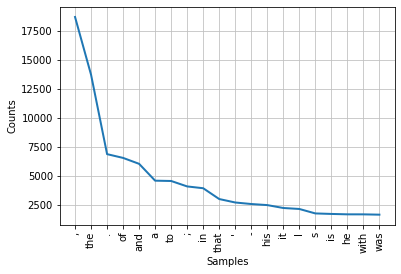

In [ ]:
#Palabras mas usadas en el libro
fdist1.plot(20)

[(',', 9397), ('to', 4063), ('.', 3975), ('the', 3861), ('of', 3565), ('and', 3350), ('her', 2436), ('a', 2043), ('I', 2004), ('in', 1904), ('was', 1846), ('it', 1568), ('"', 1506), (';', 1419), ('she', 1333), ('be', 1305), ('that', 1297), ('for', 1234), ('not', 1212), ('as', 1179)]


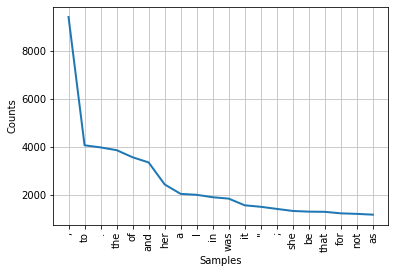

In [ ]:
fdist2=FreqDist(text2)
print(fdist2.most_common(20))
fdist2.plot(20)

## **Filtrado de palabras**

In [ ]:
#En una lista tomamos las palabras con mas de 5 letras
long_words=[palabra for palabra in text1 if len(palabra)>5]
print(f' Las palabras que tienen mas de 5 letras son: {long_words}')

 Las palabras que tienen mas de 5 letras son: ['Herman', 'Melville', 'ETYMOLOGY', 'Supplied', 'Consumptive', 'Grammar', 'School', 'threadbare', 'dusting', 'lexicons', 'grammars', 'handkerchief', 'mockingly', 'embellished', 'nations', 'grammars', 'somehow', 'mildly', 'reminded', 'mortality', 'school', 'others', 'called', 'tongue', 'leaving', 'through', 'ignorance', 'letter', 'almost', 'maketh', 'signification', 'deliver', 'HACKLUYT', 'animal', 'roundness', 'rolling', 'arched', 'vaulted', 'WEBSTER', 'DICTIONARY', 'immediately', 'WALLEN', 'wallow', 'RICHARDSON', 'DICTIONARY', 'DANISH', 'SWEDISH', 'ICELANDIC', 'ENGLISH', 'BALEINE', 'FRENCH', 'BALLENA', 'SPANISH', 'ERROMANGOAN', 'EXTRACTS', 'Supplied', 'Librarian', 'painstaking', 'burrower', 'appears', 'through', 'Vaticans', 'street', 'stalls', 'picking', 'whatever', 'random', 'allusions', 'whales', 'anyways', 'whatsoever', 'sacred', 'profane', 'Therefore', 'higgledy', 'piggledy', 'statements', 'however', 'authentic', 'extracts', 'veritable

In [ ]:
# Ordenamos la lista de palabras
vocabulario_filtrado=sorted(set(long_words))
print(f'El nuevo vocaubulario filtrado es: {vocabulario_filtrado[:20]}')

El nuevo vocaubulario filtrado es: ['ACCOUNT', 'ADDITIONAL', 'ADVANCING', 'ADVENTURES', 'AFFGHANISTAN', 'AFRICA', 'AGAINST', 'ALFRED', 'ALGERINE', 'AMERICA', 'ANCHORS', 'ANIMAL', 'ANNALS', 'ANOTHER', 'APOLOGY', 'APPLICATION', 'APPROACHING', 'ARCTIC', 'AROUND', 'ASCENDING']


In [ ]:
# En una lista de tuplas, añadimos la palabra y cuantas veces aparece en el libro
palabras_interesantes=[(palabra,fdist1[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist1[palabra]>10]
print(f'Las palabras interesantes del primer libro son: {palabras_interesantes[:20]}')

'''
NOTA: podemos saber la distribución las de las palabras pues previamente
ya se había cálculado con: fdist1=FreqDist(text1)
'''

Las palabras interesantes del primer libro son: [('flukes', 36), ('honest', 14), ('French', 18), ('lively', 13), ('minutes', 21), ('substance', 31), ('following', 23), ('mortal', 39), ('London', 13), ('intervals', 32), ('mother', 17), ('observed', 18), ('magnitude', 21), ('partly', 13), ('pleasant', 16), ('afterwards', 24), ('surface', 42), ('visible', 32), ('smoking', 18), ('spermaceti', 16)]


'\nNOTA: podemos saber la distribución las de las palabras pues previamente\nya se había cálculado con: fdist1=FreqDist(text1)\n'

In [ ]:
'''
Se cambia el formato de la lista a un objeto de Numpy, para manejar mejor
los datos.
'''
etiquetas=[('word','S10'),('frequency',int)]
palabras_interesantes=np.array(palabras_interesantes,dtype=etiquetas)

#Ordenamos la lista
palabras_interesantes=np.sort(palabras_interesantes,order='frequency')
palabras_interesantes

<function matplotlib.pyplot.show>

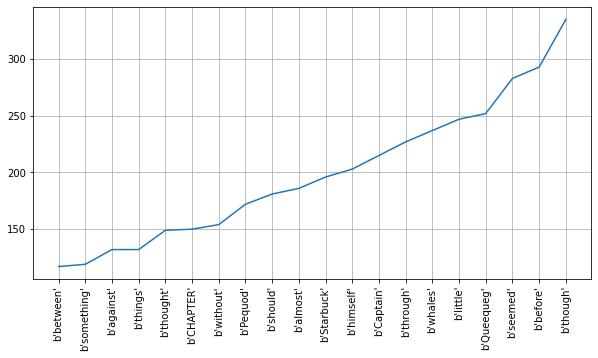

In [ ]:
#Gráfica de palabras_interesantes
top_words=20

#Definimos a x & y
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]],rotation='vertical')
plt.grid(True)
plt.show

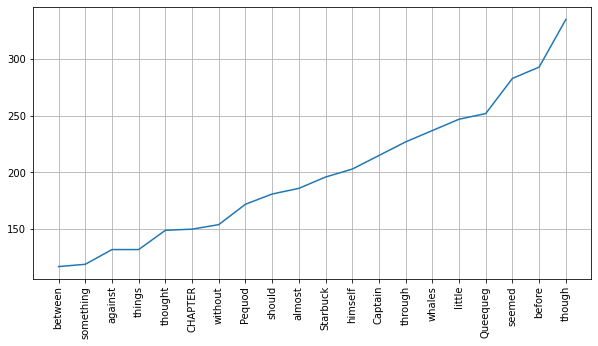

In [ ]:
#Otra manera de gráficar
top_words = 20
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')[-top_words:]
x = palabras_interesantes['word']
y = palabras_interesantes['frequency']
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x,rotation='vertical')
plt.grid(True)
plt.show()

## **N-gramas y colocaciones**

## **Bigramas**

In [ ]:
mb_bigrams=list(bigrams(text1))
fdist=FreqDist(mb_bigrams)

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

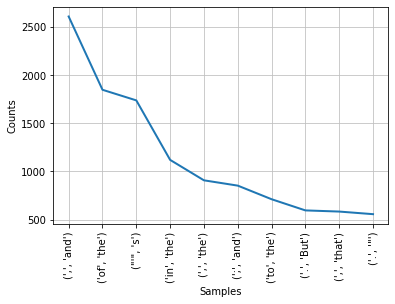

In [ ]:
fdist.plot(10)

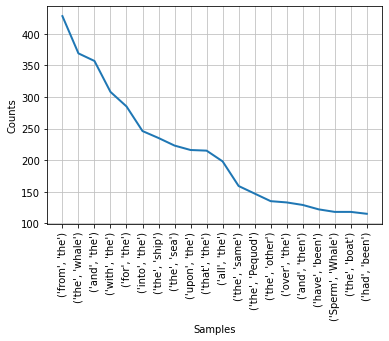

In [ ]:
umbral=2
filtered_bigrams=[bigram for bigram in mb_bigrams if len(bigram[0])>umbral and len(bigram[1])>umbral]
dis_filtrada=FreqDist(filtered_bigrams)
dis_filtrada.plot(20)

## **Trigramas**

In [ ]:
from nltk.util import ngrams

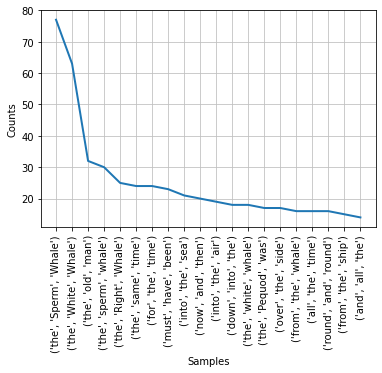

In [ ]:
md_trigrams=list(ngrams(text1,3))
umbral=2
filtered_bigrams=[bigram for bigram in md_trigrams if len(bigram[0])>umbral and len(bigram[1])>umbral and len(bigram[2])>umbral]
dis_filtrada=FreqDist(filtered_bigrams)
dis_filtrada.plot(20)

# **Colocaciones**

In [ ]:
lista_bigramas=list(bigrams(text1))
umbral=2
filtered_bigrams=[bigrama for bigrama in lista_bigramas if len(bigrama[0])>umbral and len(bigrama[1])>umbral]
dist_bigrams=FreqDist(filtered_bigrams)
dist_bigrams.most_common(10)

[(('from', 'the'), 428),
 (('the', 'whale'), 369),
 (('and', 'the'), 357),
 (('with', 'the'), 308),
 (('for', 'the'), 285),
 (('into', 'the'), 246),
 (('the', 'ship'), 235),
 (('the', 'sea'), 223),
 (('upon', 'the'), 216),
 (('that', 'the'), 215)]

In [ ]:
df=pd.DataFrame()